In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [2]:
data = pd.read_csv("advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
X = data[["TV", "Radio", "Newspaper"]].values

In [6]:
y = data[["Sales"]].values

In [7]:
means = np.mean(X, axis=0)

means

array([147.0425,  23.264 ,  30.554 ])

In [8]:
stds = np.std(X, axis=0)

stds

array([85.63933176, 14.80964564, 21.72410606])

In [9]:
rows, columns = X.shape

# TODO: very slow, speed up
for column in range(columns):
    for row in range(rows):
        X[row][column] -= means[column]
        X[row][column] /= stds[column]

In [10]:
X = np.hstack((np.ones(rows).reshape((rows, 1)), X))

In [11]:
def mse(y, y_pred):
    # Axis is none for returning scalar value
    return (np.square(y - y_pred)).mean(axis=None)

In [12]:
def linear_prediction(X, w):
    return np.dot(X, w)

In [16]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):  
    grad0 = (2 / X.shape[0]) * X[train_ind][0] * (np.dot(X[train_ind], w) - y[train_ind])
    grad1 = (2 / X.shape[0]) * X[train_ind][1] * (np.dot(X[train_ind], w) - y[train_ind])
    grad2 = (2 / X.shape[0]) * X[train_ind][2] * (np.dot(X[train_ind], w) - y[train_ind])
    grad3 = (2 / X.shape[0]) * X[train_ind][3] * (np.dot(X[train_ind], w) - y[train_ind])
    
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

In [17]:
def stochastic_gradient_descent(X, y, w_init, eta=0.01, max_iter=10000,
                                min_weight_dist=0.00000001, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
    
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        w = stochastic_gradient_step(X, y, w, random_ind, eta)
        errors.append(mse(y, linear_prediction(X, w)))
        
        iter_num += 1
        
    return w, errors

In [18]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.ones(columns + 1))

CPU times: user 834 ms, sys: 9.32 ms, total: 844 ms
Wall time: 845 ms


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

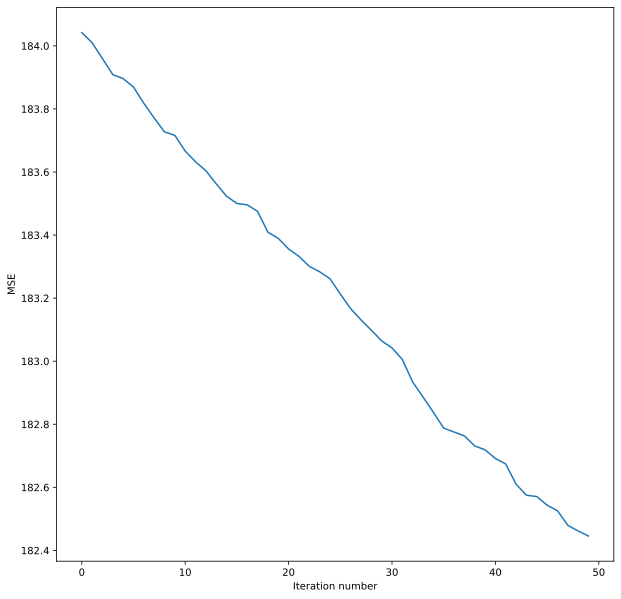

In [26]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

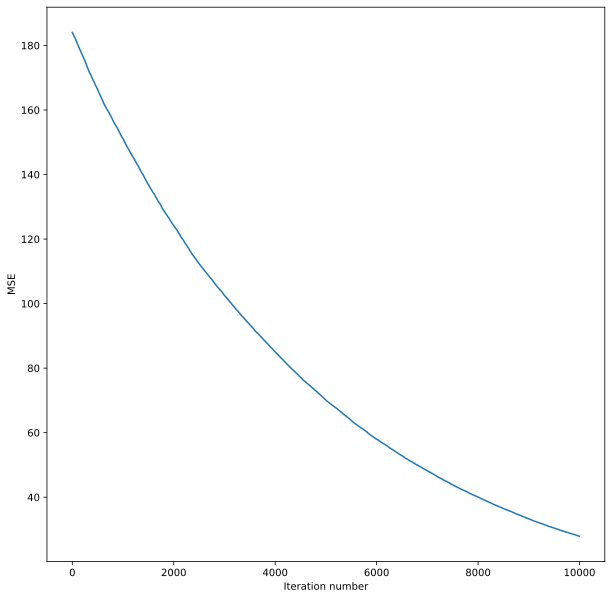

In [20]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

In [21]:
stoch_grad_desc_weights

array([[9.20937186, 9.20937186, 9.20937186, 9.20937186],
       [2.83587005, 2.83587005, 2.83587005, 2.83587005],
       [1.96878094, 1.96878094, 1.96878094, 1.96878094],
       [0.67583603, 0.67583603, 0.67583603, 0.67583603]])

In [22]:
stoch_errors_by_iter[-1]

27.894429108511776